# MODIS spatial autocorrelation



In [4]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pysal
import numpy as np
from scipy.spatial import distance_matrix


# Import MODIS data for one square
sq1 =pd.read_csv("../data/modis_pasture_A2018_square1.csv")

In [91]:
# Distance bins
dist_bins = np.linspace(0.1,10,10)*1000
moran_I = np.zeros(dist_bins.shape)

In [92]:
# Calculate distances between points
xy_pairs = sq1.iloc[:,0:2]
dist_pairwise = distance_matrix(xy_pairs, xy_pairs,2)

In [93]:
# Calculate Moran's I for each distance class
for i in range(len(dist_bins)-1):
    ind = np.where((dist_pairwise>=dist_bins[i]) & (dist_pairwise<dist_bins[i+1]))
    moran_I[i] = np.corrcoef(sq1.evi[ind[0]], sq1.evi[ind[1]])[0,1]
    

In [94]:
moran_I

array([ 2.10630144e-02,  7.28477069e-03,  5.55313202e-03, -1.16594453e-03,
       -8.64229615e-03, -1.91647221e-03, -1.21524715e-02,  1.67678340e-05,
        4.31430474e-03,  0.00000000e+00])

Text(0,0.5,"Moran's I")

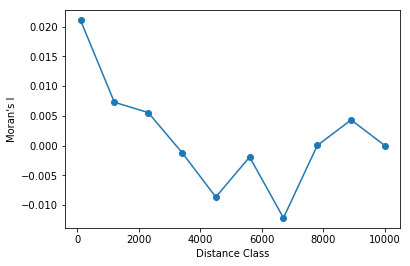

In [95]:
plt.plot(dist_bins, moran_I,'-o')
plt.xlabel('Distance Class')
plt.ylabel('Moran\'s I')